In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import calendar
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore') #remove warning

In [2]:
df = pd.read_csv("https://media.githubusercontent.com/media/DBertazioli/NeoMeetup/master/csv/exported_queries/Distribuzione_temporale_eventi_fix_with_members.csv")
df.head()

,Unnamed: 0,ID,time,country,state,lon,lat,partecipanti,timezone_str,datetime_timezoned
0,0,260269871,5317552800000,us,ca,-118.33,33.87,1,America/Los_Angeles,04/07/2138 10:00:00
1,1,260260779,3384554400000,us,wa,-117.43,47.67,2,America/Los_Angeles,01/04/2077 18:00:00
2,2,ztbltqyxcdbbc,2150290800000,us,tn,-86.72,36.08,1,America/Chicago,20/02/2038 09:00:00
3,3,260361735,1924992000000,sg,sg,103.85,1.30,1,Asia/Singapore,01/01/2031 08:00:00
4,4,260337211,1924992000000,sg,sg,103.85,1.30,1,Asia/Singapore,01/01/2031 08:00:00


In [3]:
tmp = df['datetime_timezoned'].str.split(" ", n = 1, expand = True) #create distinct columns date and time
df['day'] = [calendar.day_name[dt.strptime(date, '%d/%m/%Y').weekday()] for date in tmp[0]] #transform date into day
df['dtime'] = tmp[1] #take time
df.head()

,Unnamed: 0,ID,time,country,state,lon,lat,partecipanti,timezone_str,datetime_timezoned,day,dtime
0,0,260269871,5317552800000,us,ca,-118.33,33.87,1,America/Los_Angeles,04/07/2138 10:00:00,Friday,10:00:00
1,1,260260779,3384554400000,us,wa,-117.43,47.67,2,America/Los_Angeles,01/04/2077 18:00:00,Thursday,18:00:00
2,2,ztbltqyxcdbbc,2150290800000,us,tn,-86.72,36.08,1,America/Chicago,20/02/2038 09:00:00,Saturday,09:00:00
3,3,260361735,1924992000000,sg,sg,103.85,1.30,1,Asia/Singapore,01/01/2031 08:00:00,Wednesday,08:00:00
4,4,260337211,1924992000000,sg,sg,103.85,1.30,1,Asia/Singapore,01/01/2031 08:00:00,Wednesday,08:00:00


In [4]:
df_date = df[['day','dtime']] #define new dataframe for explore with viz
df_date.head() #check

,day,dtime
0,Friday,10:00:00
1,Thursday,18:00:00
2,Saturday,09:00:00
3,Wednesday,08:00:00
4,Wednesday,08:00:00


In [5]:
df_date['day'] = pd.Categorical(df_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table

dtime,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
day,,,,,,,,,,,,,,,,,,,,,
Monday,56,10,4,2,5,12,81,171,266,678,...,279,286,367,841,4776,10332,2766,472,104,17
Tuesday,45,4,3,3,5,31,82,516,951,1089,...,412,382,549,1467,9025,17002,4047,718,95,50
Wednesday,39,6,6,8,5,24,107,808,1099,1315,...,484,464,543,1568,9910,17734,4290,621,142,40
Thursday,52,9,4,2,4,31,106,612,1191,1188,...,542,473,664,1721,9620,17656,4331,861,198,71
Friday,121,10,4,7,12,22,112,427,754,1079,...,528,611,706,1494,4581,9104,4312,1330,646,182
Saturday,145,42,23,20,20,60,269,1041,2597,6183,...,4741,3330,2416,2271,3317,5701,3264,1072,663,215
Sunday,77,15,11,14,9,39,127,465,1210,2690,...,4384,3076,2232,2007,2158,2468,778,232,80,64


In [6]:
#only if are present nan or float 
#pivot_table = pivot_table.fillna(0)
#pivot_table = pivot_table.astype(int)

In [7]:
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size

Text(141,0.5,'Weekdays')

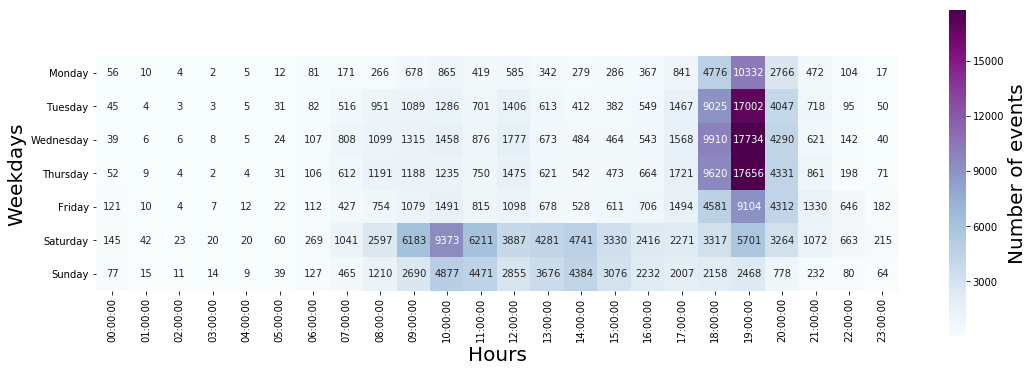

In [8]:
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)

In [9]:
#figure.figure.savefig("C:/Users/fabri/OneDrive/Desktop/heatmap.png")